In [21]:
import matplotlib.pyplot as plt
import numpy as np
from random import random
import time
%matplotlib inline

In [22]:
# Define simulation parameters
xlim = 20
ylim = 20
num_robots = 3
dt = 0.01

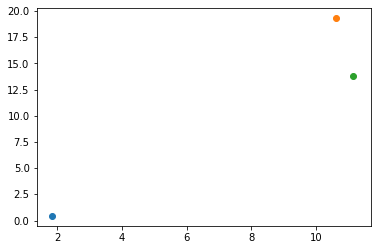

In [23]:
# Initialize pose for 3 robots
x = []  # System of robots with (X, Y, theta)

# plt.xlim(0, xlim)  # Set x limit for plt
# plt.ylim(0, ylim)  # Set y limit for plt
for _ in range(num_robots):
    X_start = round(xlim * random(), 2)
    Y_start = round(ylim * random(), 2)
    # theta_start = round(2 * np.pi * random() - np.pi, 2)
    x.append(np.array([X_start, Y_start]))
    # plt.arrow(X_start, Y_start, np.cos(theta_start), np.sin(theta_start), width=0.1)
    plt.scatter(X_start, Y_start)

### Rendezvous error
![Rendezvous Error equation](img/rendezvous-error.png)
### Redezvous error gradient
![Rendezvous Error gradient](img/rendezvous-error-gradient.png)

In [24]:
def rendezvous_error(x):
    # Calculate the error
    err = 0
    for i in range(len(x)):
        for j in range(len(x)):
            if j == i:
                continue
            err += np.linalg.norm(x[i] - x[j])
    
    err /=2
    return err

[array([5.92804687, 7.73387758]), array([ 8.79526131, 13.88455994]), array([ 8.96020537, 12.07268563])]


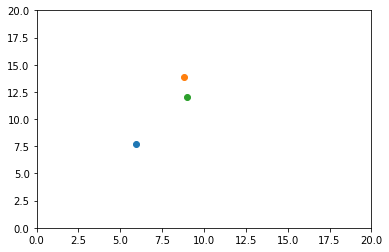

[array([5.9870406 , 7.83877249]), array([ 8.76882855, 13.80598332]), array([ 8.92855995, 12.04767947])]


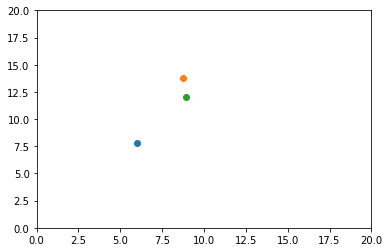

[array([6.04427367, 7.94053367]), array([ 8.74318031, 13.72974579]), array([ 8.89786329, 12.02342868])]


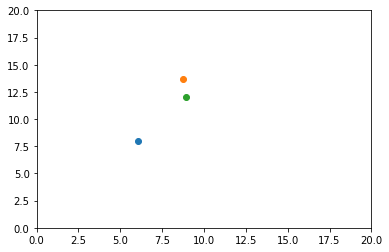

[array([6.09979864, 8.03925474]), array([ 8.71829332, 13.6557777 ]), array([ 8.86808695, 11.99991043])]


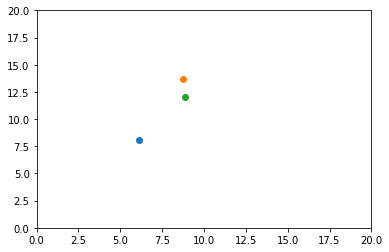

[array([6.15366647, 8.13502652]), array([ 8.69414499, 13.58401152]), array([ 8.83920332, 11.9771026 ])]


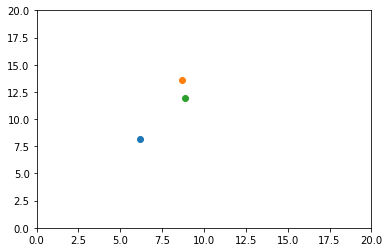

[array([6.20592662, 8.22793714]), array([ 8.67071339, 13.51438169]), array([ 8.81118566, 11.95498374])]


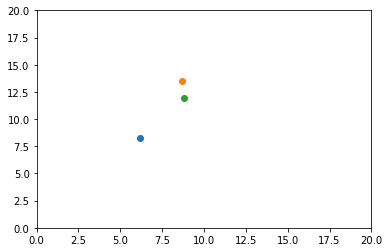

[array([6.25662708, 8.31807205]), array([ 8.64797725, 13.44682461]), array([ 8.78400799, 11.93353303])]


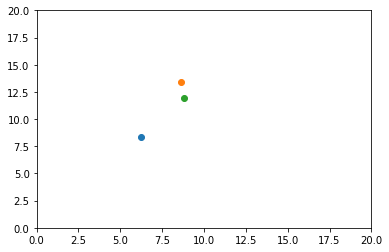

[array([6.30581439, 8.40551418]), array([ 8.62591593, 13.38127859]), array([ 8.75764513, 11.9127303 ])]


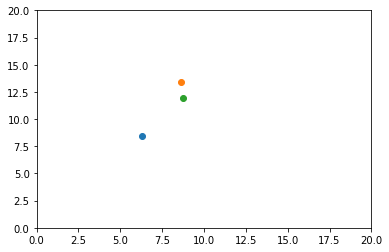

[array([6.35353371, 8.49034399]), array([ 8.6045094 , 13.31768376]), array([ 8.73207266, 11.89255597])]


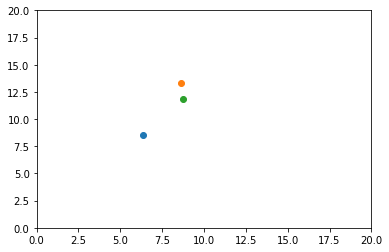

[array([6.39982886, 8.57263951]), array([ 8.58373823, 13.25598204]), array([ 8.70726688, 11.87299106])]


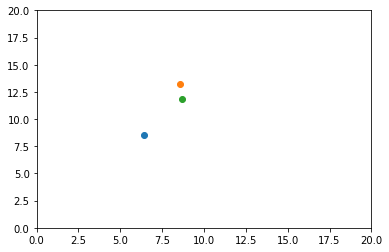

[array([6.44474233, 8.65247645]), array([ 8.56358355, 13.19611708]), array([ 8.6832048 , 11.85401718])]


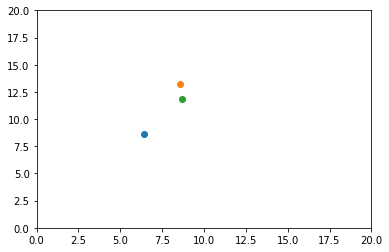

[array([6.48831537, 8.72992826]), array([ 8.54402708, 13.13803419]), array([ 8.65986413, 11.83561646])]


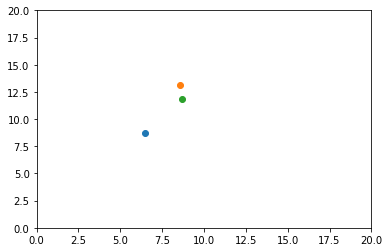

[array([6.53058797, 8.8050662 ]), array([ 8.52505106, 13.08168033]), array([ 8.63722323, 11.81777159])]


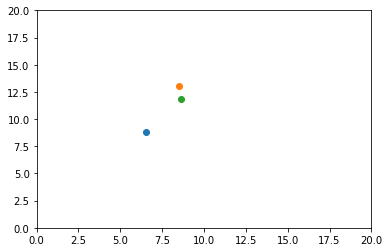

[array([6.57159896, 8.8779594 ]), array([ 8.50663826, 13.02700403]), array([ 8.61526114, 11.8004658 ])]


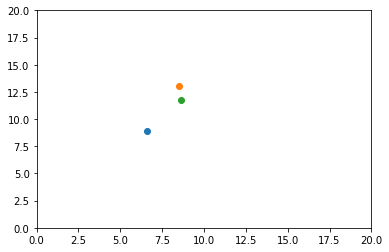

[array([6.61138597, 8.94867491]), array([ 8.48877197, 12.97395536]), array([ 8.5939575 , 11.78368278])]


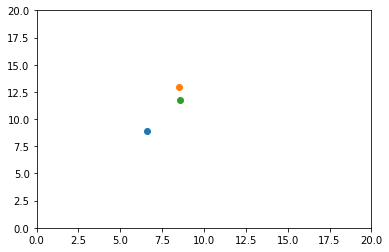

[array([6.64998555, 9.01727779]), array([ 8.47143596, 12.92248586]), array([ 8.57329256, 11.76740676])]


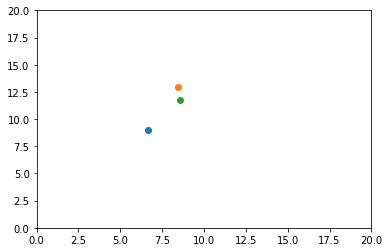

[array([6.68743312, 9.08383116]), array([ 8.4546145 , 12.87254852]), array([ 8.55324719, 11.75162243])]


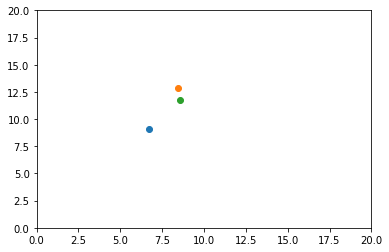

KeyboardInterrupt: 

In [26]:
# Store a list of trajectories
x_traj = []
x_traj.append(x)
err = rendezvous_error(x)
while err>0.5:
    # Create x_diff list which stores difference between current pose and desired pose
    x_diff = []
    for i in range(num_robots):
        x_diff.append(np.array([0.,0.]))
    # Calculate the point to move towards
    for i in range(num_robots):
        for j in range(num_robots):
            if j == i:
                continue
            x_diff[i] += x[i] - x[j] 
        theta = (np.arctan2(x_diff[i][1], x_diff[i][0]) + np.pi) % (2 * np.pi) - np.pi
        dist = np.hypot(x_diff[i][0], x_diff[i][1])
        x[i][0] = x[i][0] -  dist * np.cos(theta) * dt
        x[i][1] = x[i][1] -  dist * np.sin(theta) * dt
    
    err = rendezvous_error(x)
    print(x)
    plt.cla()
    for robot_pose in x:
        _ = plt.scatter(robot_pose[0], robot_pose[1])
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    plt.pause(0.1)
    plt.show()